# Gradient Descent Methods

We want to minimize a smooth function $f : \mathbb{R} ^d \to \mathbb{R}$. In this tour, we restrict our attention to convex function, so that the methods will converge to a global minimizer.

The simplest method is the gradient descent, that computes $ x ^{(k+1)} = x ^{(k)} - \tau _k \nabla f (x ^{(k)})$ where, $ \tau _k > 0$ is a step size.

In the convex case, if f is of class $\mathcal{C} ^2 $, in order to ensure convergence, the step size should satisfy the following condition : $0 < \tau _k < \frac{2}{\text{sup} || \text{H} f(x) ||}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

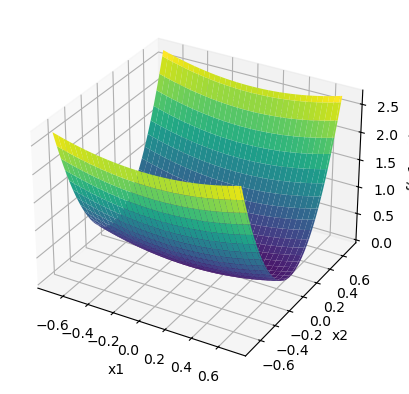

In [14]:
def f(x1, x2, eta = 10):
    """Function to be minimized.

    Args:
        x1: first parameter
        x2 :  second parameter
        eta : Anisotropy parameter (positive scalar)

    """
    return (x1**2 + eta * x2**2) / 2

eta = 10
t = np.linspace(-.7,.7,101)
[X1, X2] = np.meshgrid(t, t)

F = f(X1, X2)

# 3D plot
fig = plt.figure()
plt.ion()  # interactive mode
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.show()

In [9]:
# We compute the gradient of the function f
def grad_f(x1, x2, eta = 10):
    """Gradient of the function f.

    Args:
        x1: first parameter
        x2 :  second parameter
        eta : Anisotropy parameter (positive scalar)

    """
    return np.array([x1, eta * x2])

grad_F = grad_f(F[0,:], F[1,:])

# The step size should satisfy the following condition tau_k < 2 / eta
# We choose tau_k = 1.8 / eta

tau = 1.8 / 10
start1, start2 = np.random.choice(t), np.random.choice(t)

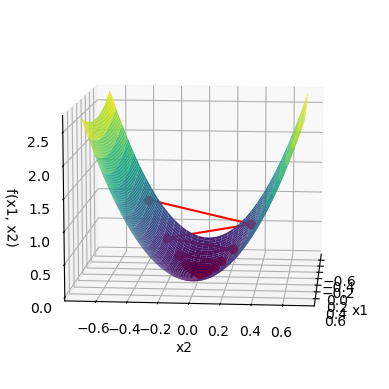

In [20]:
# Perform the gradient descent
x1, x2 = start1, start2
liste_F = [f(x1, x2)]
liste_x1, liste_x2 = [x1], [x2]
for _ in range(1000):
    x1, x2 = x1 - tau * x1, x2 - tau * eta * x2
    liste_F.append(f(x1, x2))
    liste_x1.append(x1)
    liste_x2.append(x2)

fig = plt.figure()
plt.ion()  # interactive mode
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis')
ax.plot(liste_x1, liste_x2, liste_F, color='r', marker='o', label="Descente de Gradient")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.view_init(elev=10, azim=5)
plt.show()